In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import nbgwas
from nbgwas.nbgwas import Nbgwas

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
nbgwas.__version__

'0.3.0'

# Gene Level Summary

In [5]:
%%time

gene_level_summary_file = '../data/scz/gene_level_summary_stats_pmid_25056061.txt'
g = Nbgwas().read_gene_table(gene_level_summary_file)

CPU times: user 104 ms, sys: 12 ms, total: 116 ms
Wall time: 126 ms


In [6]:
%%time

g.read_nx_pickle_file('../data/networks/pcnet.pkl')

CPU times: user 1.64 s, sys: 468 ms, total: 2.11 s
Wall time: 2.11 s


In [7]:
g.gene_level_summary.head()

,Gene,Chr,Gene Start,Gene End,nSNPs,TopSNP,TopSNP Pos,TopSNP P-Value,SNP Distance
0,HIST1H4K,6,27906930,27907284,8,rs34706883,27913234.0,5.071180e-10,6304.0
1,HIST1H2AK,6,27913636,27914096,16,rs34706883,27913234.0,5.071180e-10,402.0
2,HIST1H2BN,6,27914418,27914867,17,rs34706883,27913234.0,5.071180e-10,1184.0
3,HIST1H2AL,6,27941085,27941555,10,rs13199772,27942064.0,7.053790e-10,979.0
4,HIST1H1B,6,27942548,27943338,10,rs13199772,27942064.0,7.053790e-10,484.0


In [12]:
%%time 

g.cache_network_data() #this loads the adjacency matrix and laplacian matrix in memory
                       #Makes subsequent diffusions very fast

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 38.9 µs


In [13]:
%%time 

g.diffuse(method='random_walk', alpha=0.5, name='a=0.5', replace=True)

CPU times: user 1.02 s, sys: 72 ms, total: 1.09 s
Wall time: 1.09 s


In [15]:
g.boosted_pvalues.head()

,a=0.5
Genes,
TCF4,0.539516
HIST1H4C,0.526994
HIST1H2BC,0.526892
HIST1H2BN,0.525755
HIST1H4J,0.525601


In [16]:
%%time 

g.diffuse(method='random_walk', alpha=0.2, name='a=0.2', replace=False)
g.diffuse(method='random_walk', alpha=0.8, name='a=0.8', replace=False)

CPU times: user 2.14 s, sys: 144 ms, total: 2.28 s
Wall time: 2.28 s


In [17]:
g.boosted_pvalues.head()

,a=0.5,a=0.2,a=0.8
Genes,,,
TCF4,0.539516,0.231018,0.823535
HIST1H4C,0.526994,0.224937,0.814388
HIST1H2BC,0.526892,0.224309,0.814440
HIST1H2BN,0.525755,0.222505,0.813839
HIST1H4J,0.525601,0.222313,0.813903


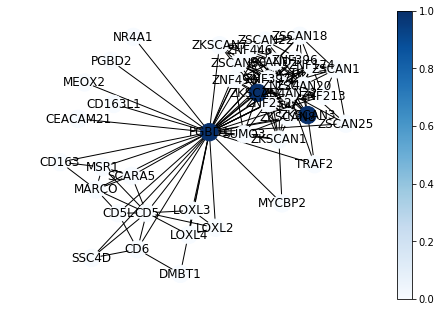

In [18]:
g.annotate_network(values="Heat", inplace=True)
g.view_subgraph('PGBD1', attributes="Heat")

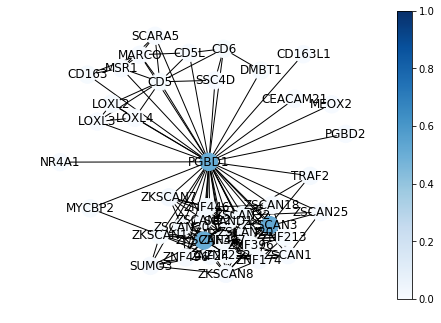

In [19]:
g.annotate_network(values="a=0.5", inplace=True)
g.view_subgraph('PGBD1', attributes="a=0.5")

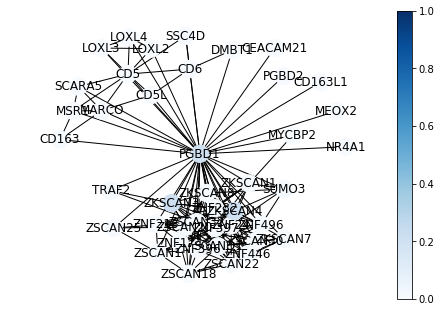

In [20]:
g.annotate_network(values="a=0.2", inplace=True)
g.view_subgraph('PGBD1', attributes="a=0.2")

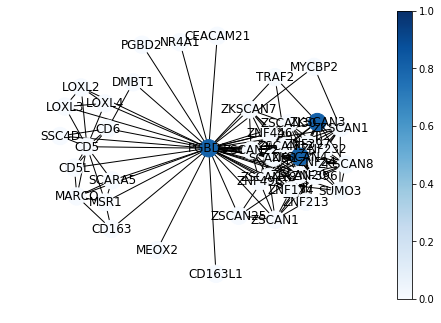

In [21]:
g.annotate_network(values="a=0.8", inplace=True)
g.view_subgraph('PGBD1', attributes="a=0.8")

# SNP Level Summary

In [22]:
del g

In [29]:
%%time 

snp_level_summary_file = '../data/scz/snp_level_summary_stats_pmid_25056061.txt'
protein_coding_file = '../data/glist-hg18_proteinCoding.txt'

g = Nbgwas() \
    .read_snp_table(snp_level_summary_file) \
    .read_protein_coding_table(protein_coding_file)

CPU times: user 1.93 s, sys: 96 ms, total: 2.02 s
Wall time: 2.02 s


In [30]:
%%time 

g.read_cx_file('../data/networks/GIANT.cx')

CPU times: user 43.1 s, sys: 1.58 s, total: 44.6 s
Wall time: 45 s


In [31]:
g.network

In [32]:
g.snp_level_summary.head()

,snpid,hg18chr,bp,a1,a2,or,se,pval,info,ngt,CEUaf
0,rs3131972,1,742584,A,G,1.0257,0.0835,0.761033,0.1613,0,0.16055
1,rs3131969,1,744045,A,G,1.0221,0.0801,0.784919,0.2225,0,0.133028
2,rs3131967,1,744197,T,C,1.0227,0.0858,0.793520,0.2060,0,.
3,rs1048488,1,750775,T,C,0.9749,0.0835,0.761041,0.1613,0,0.836449
4,rs12562034,1,758311,A,G,1.0011,0.0756,0.987899,0.1856,3,0.0925926


In [33]:
g.protein_coding_table.head()

,Chromosome,Start,End
A1BG,19,63551643,63565932
A1CF,10,52271589,52315441
A2M,12,9111570,9159825
A2ML1,12,8911704,8930864
A3GALT2,1,33544953,33559286


In [36]:
%%time

g.assign_pvalues(window_size=10000)

CPU times: user 2.73 s, sys: 56 ms, total: 2.78 s
Wall time: 2.78 s


In [37]:
g.gene_level_summary.head()

,Gene,Chromosome,Start,End,nSNPS,TopSNP P-Value,TopSNP Position
0,A1BG,19,63551643,63565932,12.0,0.117584,63556880.0
1,A1CF,10,52271589,52315441,21.0,0.247487,52290471.0
2,A2M,12,9111570,9159825,33.0,0.118248,9141868.0
3,A2ML1,12,8911704,8930864,31.0,0.173438,8920953.0
4,A3GALT2,1,33544953,33559286,17.0,0.100226,33551630.0


In [44]:
g.convert_to_heat()

In [46]:
g.heat.head()

,Heat
GPX5,1.0
HIST1H3C,1.0
SDCCAG8,1.0
HLA-DRB5,1.0
HIST1H3I,1.0


In [47]:
g.convert_to_heat(method='neg_log')

In [48]:
g.heat.head()

,Heat
HIST1H2BN,21.402277
HIST1H4K,21.402277
HIST1H2AK,21.402277
HIST1H4L,21.072286
HIST1H1B,21.072286
